In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [3]:
labels = {0: "T-shirt/top", 1: "Trouser", 2 : "Pullover", 3:"Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

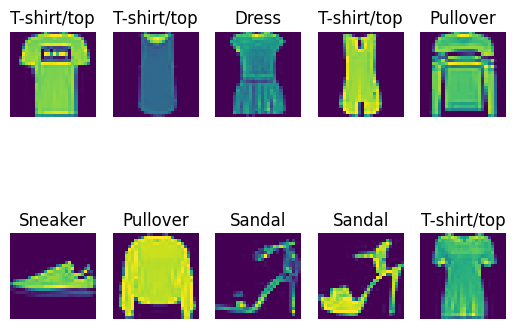

In [13]:
for i in range(1, 10 + 1):
  plt.subplot(2, 5, i)
  plt.imshow(X_train[i])
  plt.axis('off')
  plt.title(labels[Y_train[i]])
plt.show()

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [23]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [24]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train,  validation_data = (X_test, Y_test), epochs = 10, verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5177 - accuracy: 0.8181 - val_loss: 0.4422 - val_accuracy: 0.8421
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3845 - accuracy: 0.8609 - val_loss: 0.3997 - val_accuracy: 0.8575
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3502 - accuracy: 0.8715 - val_loss: 0.3732 - val_accuracy: 0.8668
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3263 - accuracy: 0.8812 - val_loss: 0.3725 - val_accuracy: 0.8638
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3111 - accuracy: 0.8852 - val_loss: 0.3670 - val_accuracy: 0.8680
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2984 - accuracy: 0.8905 - val_loss: 0.3570 - val_accuracy: 0.8724
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2863 - accuracy: 0.8945 - val_loss: 0.3614 - val_accuracy:

313/313 [==============================] - 1s 2ms/step


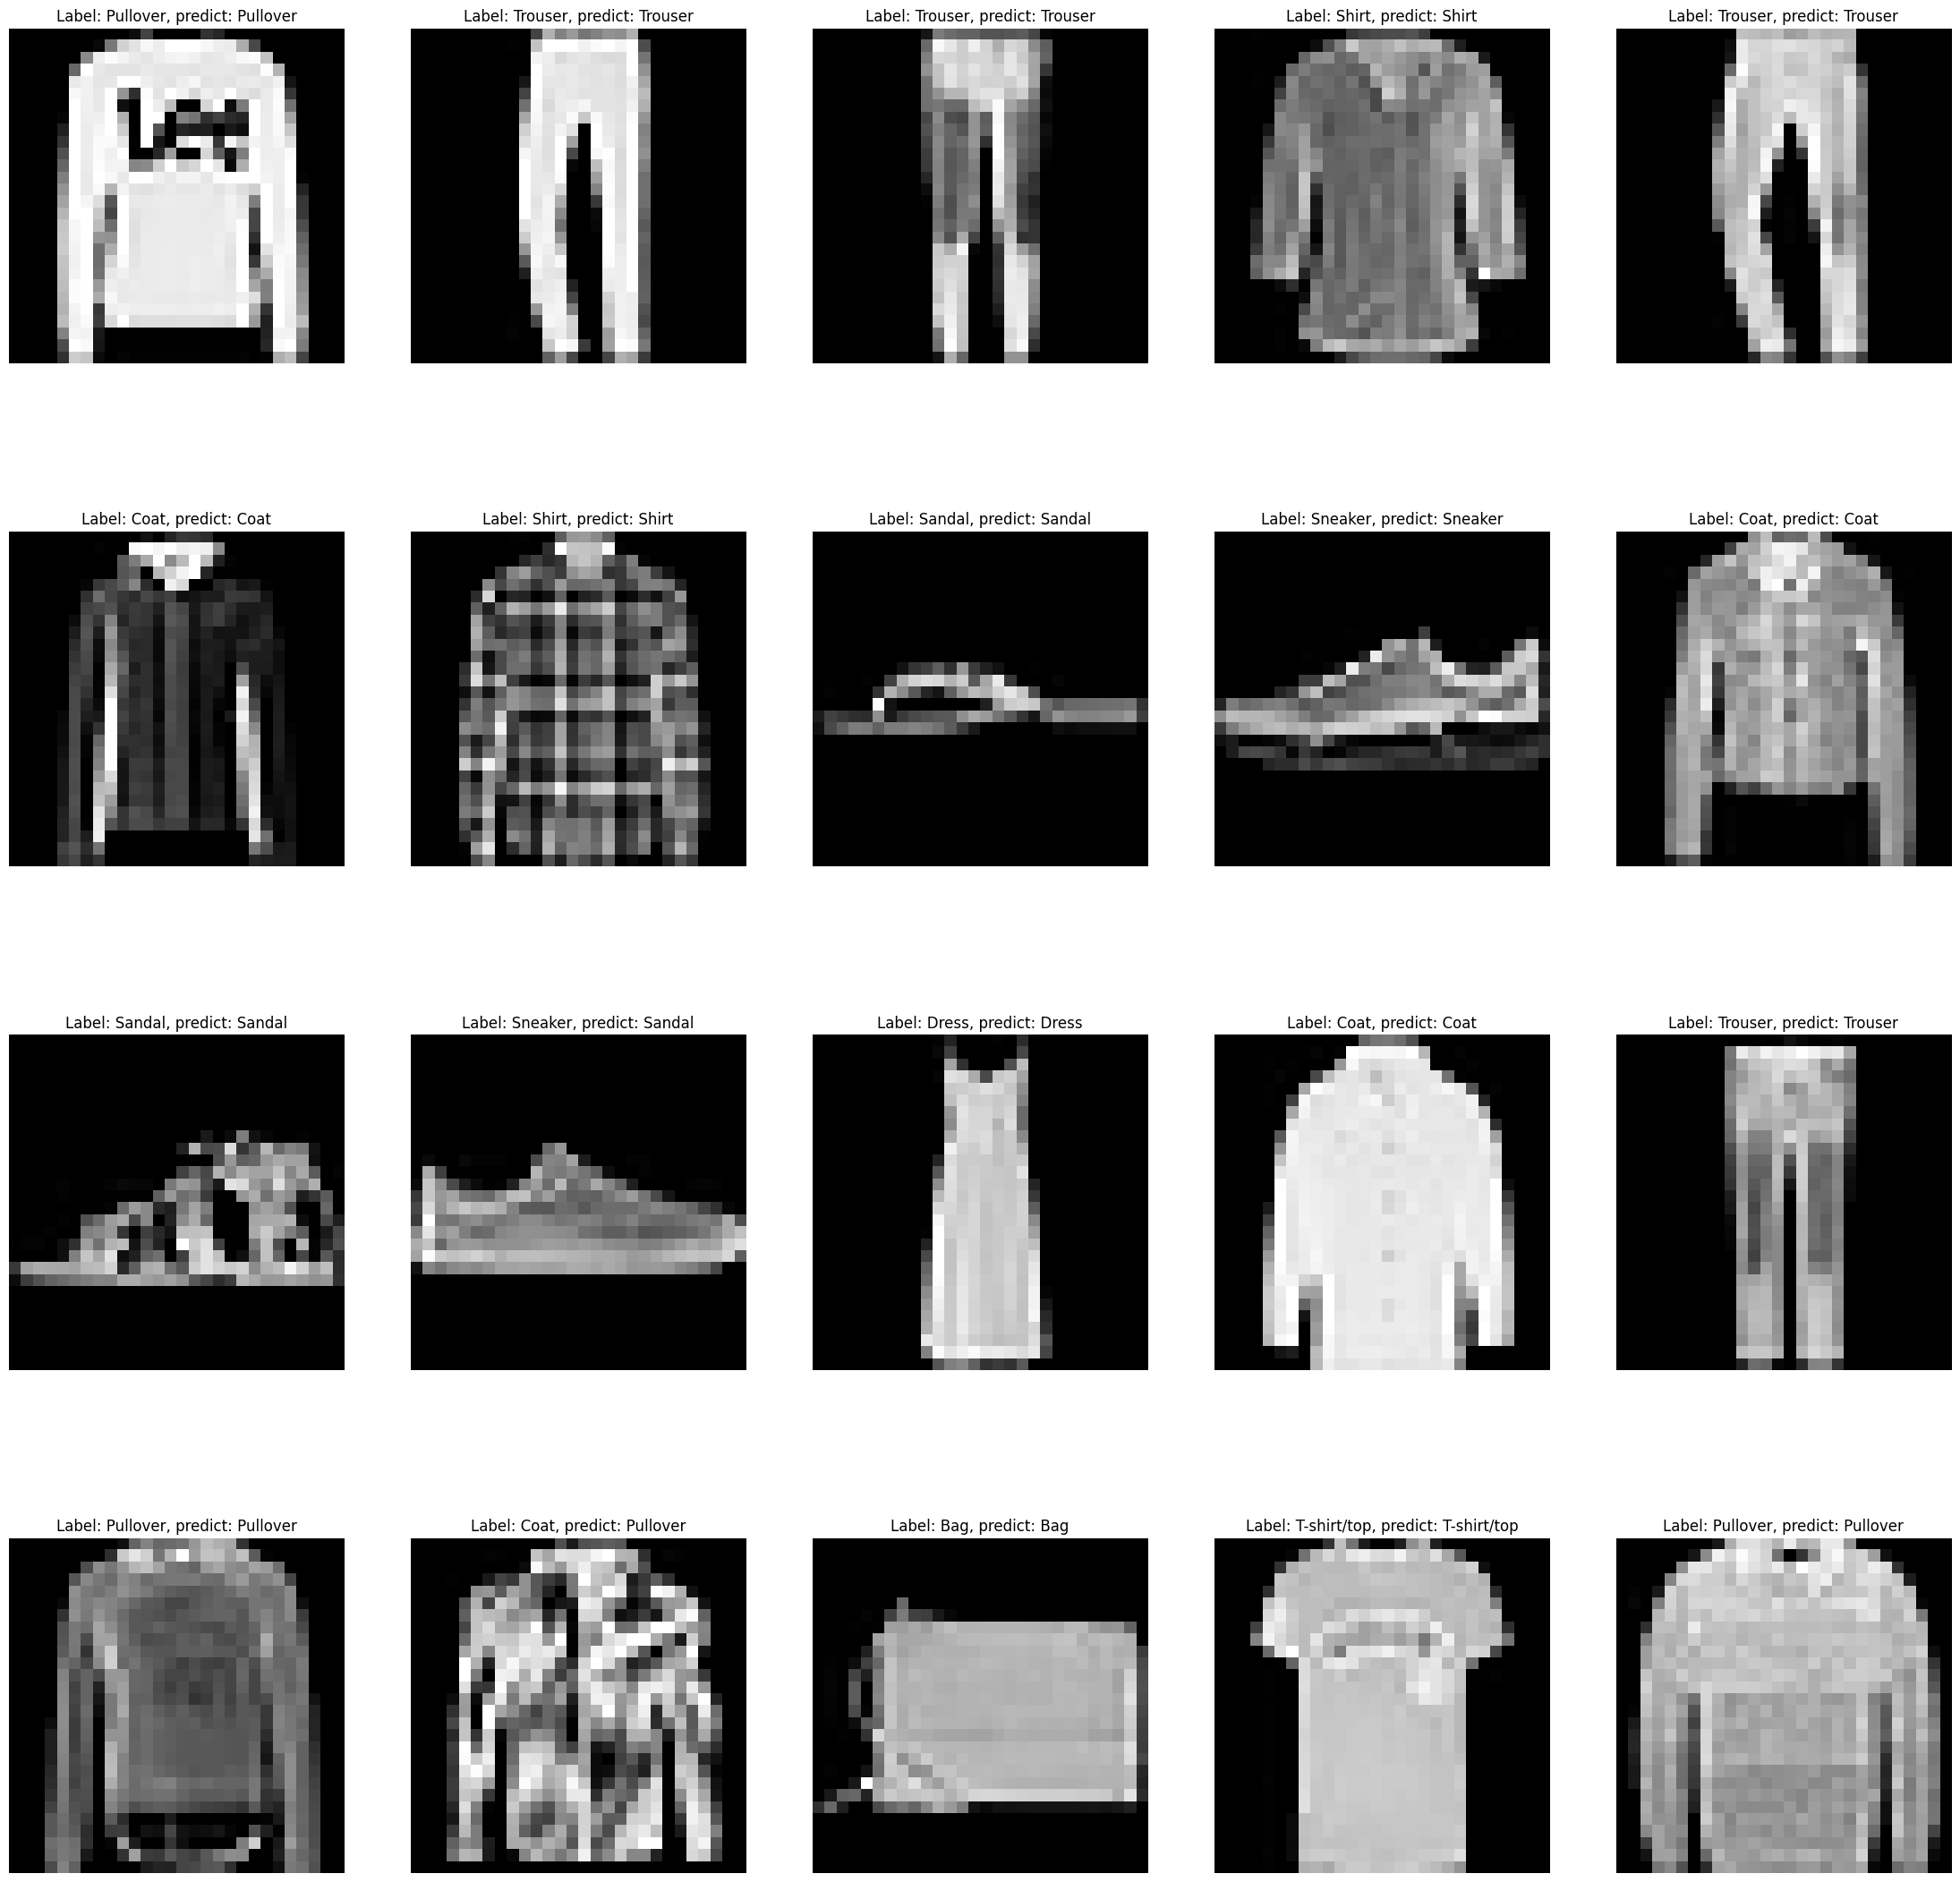

In [32]:
predicted_labels = np.argmax(model.predict(X_test), axis = 1)
plt.figure(figsize=(28, 28))
for i in range(1, 20 + 1):
    plt.subplot(4, 5, i)
    plt.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
    plt.title(f"Label: {labels[Y_test[i]]}, predict: {labels[predicted_labels[i]]}")
    plt.axis('off')
plt.show()